In [4]:
import numpy as np

def snr(data, z, k_s, k_e):
    """
    Calculate Signal-to-Noise Ratio (SNR) for features in specified range
    
    Parameters:
    data : ndarray of shape (n_samples, n_features)
        Input data matrix
    z : ndarray of shape (n_samples,)
        Group labels array for sample grouping
    k_s : int
        Start index of features (inclusive)
    k_e : int
        End index of features (exclusive)
    
    Returns:
    list_snr : list
        SNR values for features [k_s, k_e-1]
    """
    unique_values, indices = np.unique(z, return_inverse=True)
    dict_address = {val: np.where(indices == idx)[0] for idx, val in enumerate(unique_values)}
    list_snr=[]
    for i in range(k_s,k_e):
        var_E=[]
        E_var=[]
        d = data[:, i]
        for k,v in dict_address.items():
            a=d[v]
            E_a=np.mean(a)
            var_a=np.var(a)
            var_E.append(E_a)
            E_var.append(var_a)
        var_E=np.array(var_E)
        E_var=np.array(E_var)
        result=np.var(var_E)/np.mean(E_var)
        list_snr.append(result)
    return list_snr

In [5]:
Source_path='./Dataset/rk1=0x35/'
label_Source=np.load(Source_path+'label_V.npy')[:20000]
traces_Source=np.load(Source_path+'trace.npy')[:20000]



list_snr_Source=snr(traces_Source, label_Source, 0, 500)


Target_path1='./Dataset/rk1=0x2b/'
label_Target1=np.load(Target_path1+'label_V.npy')
traces_Target1=np.load(Target_path1+'trace.npy')

list_snr_Target1=snr(traces_Target1, label_Target1, 0, 500)


Target_path2='./Dataset/rk1=0xce/'
label_Target2=np.load(Target_path2+'label_V.npy')
traces_Target2=np.load(Target_path2+'trace.npy')

list_snr_Target2=snr(traces_Target2, label_Target2, 0, 500)


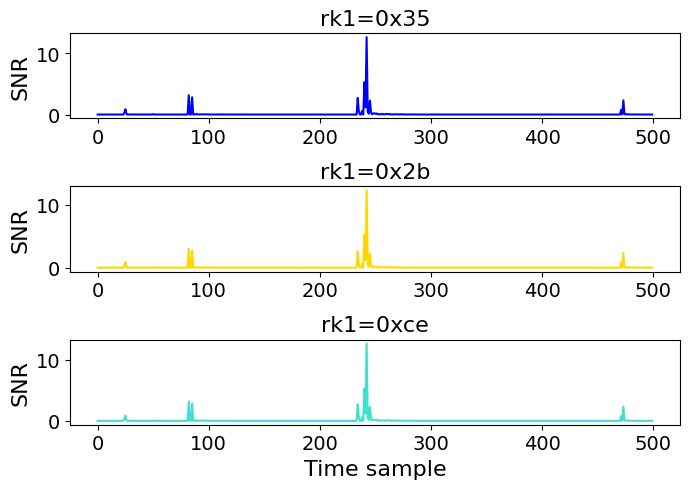

In [7]:
import matplotlib
import matplotlib.pyplot as plt
x=np.arange(500)

plt.figure(figsize=(7, 5))

plt.subplot(3, 1, 1)
plt.plot(x, list_snr_Source,color='b')
plt.ylabel("SNR", fontsize=16, )
plt.tick_params(labelsize=14)
plt.title('rk1=0x35', fontsize=16)


plt.subplot(3, 1, 2)
plt.plot(x, list_snr_Target1,color='gold')
plt.ylabel("SNR", fontsize=16, )
plt.tick_params(labelsize=14)
plt.title('rk1=0x2b', fontsize=16)


plt.subplot(3, 1, 3)
plt.plot(x, list_snr_Source,color='turquoise')
plt.ylabel("SNR", fontsize=16, )
plt.xlabel("Time sample", fontsize=16)
plt.tick_params(labelsize=14)
plt.title('rk1=0xce', fontsize=16)
plt.tight_layout()
plt.savefig('Pilsung_SBOX_LK.pdf')
plt.show()